# Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/ZIWM projekt/data/hepatitis.data'

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# Load data

In [5]:
columns = ['class', 'age', 'sex', 'seroid', 'antviral',
           'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
           'spleen_palpable',  'spiders', 'ascites', 'varices', 'bilirubin', 
           'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

columns_to_drop = ['alk_phosphate', 'protime']

df = pd.read_csv(data_path, names=columns)

## Sanitize data

In [6]:
# drop columns with many empty records
df = df.drop(columns_to_drop, axis=1)
# mark '?' as NaN
df = df[df != '?']
# drop NaN
df = df.dropna()
df = df.reset_index(drop=True)
# convert 'Object' type to floats and ints
df[['bilirubin', 'sgot', 'albumin']] = df[['bilirubin', 'sgot', 'albumin']].astype('float')
df[['class', 'sex', 'seroid', 'antviral', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']] = df[['class', 'sex', 'seroid', 'antviral', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']].astype(int)
# replace class marks
df.replace({1: 0, 2: 1}, inplace=True)
# divdie df to X and y sets
X = df.drop(['class'], axis=1)
y = df['class']

X.head()

,age,sex,seroid,antviral,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology
0,30,1,0,1,1,1,1,0,1,1,1,1,1,0.0,18.0,4.0,0
1,50,0,0,1,0,1,1,0,1,1,1,1,1,0.9,42.0,3.5,0
2,78,0,1,1,0,1,1,1,1,1,1,1,1,0.7,32.0,4.0,0
3,34,0,1,1,1,1,1,1,1,1,1,1,1,0.0,200.0,4.0,0
4,34,0,1,1,1,1,1,1,1,1,1,1,1,0.9,28.0,4.0,0


# Features ranking

In [7]:
# use chi-squared test to make features ranking
chi2_selector = SelectKBest(chi2, k=X.shape[1])
chi2_selector.fit(X, y)

SelectKBest(k=17, score_func=<function chi2 at 0x7fc21b9f3290>)

## Ranking table

In [8]:
# create ranking table
chi2_scores = pd.DataFrame(list(zip(X.columns, chi2_selector.scores_)), columns=['feature', 'score'])
chi2_scores = chi2_scores.round(2)
chi2_scores = chi2_scores.sort_values('score', ascending=False)

## Bar plot

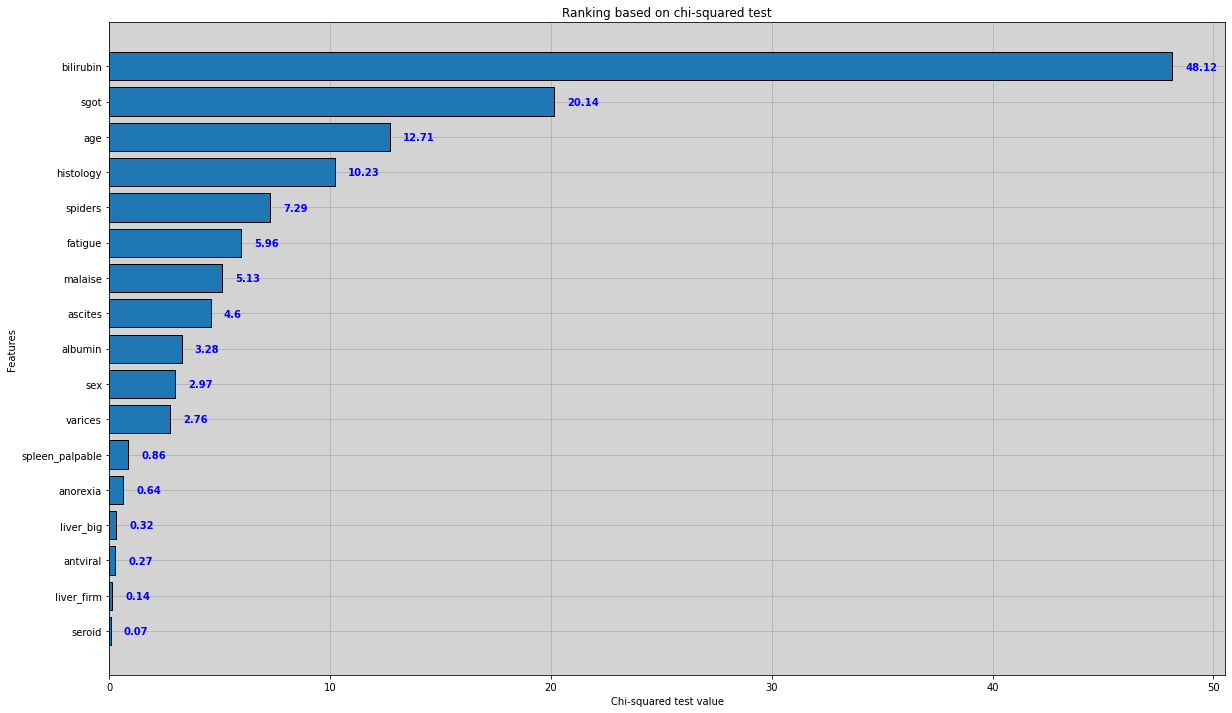

In [42]:
# display bar plot
plt.figure(figsize=(20,12))
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.grid(zorder=0)
estimator_num = len(chi2_scores['feature'])

# sort ascending because horizontal bars print in reverse order
ascending_features = chi2_scores.sort_values('score', ascending=True)

# create horizontal bar plot
plt.barh(range(estimator_num), ascending_features['score'], align='center', zorder=3, edgecolor='black')

# label bars and axis
plt.yticks(range(estimator_num), ascending_features['feature'])
plt.title('Ranking based on chi-squared test')
plt.ylabel('Features')
plt.xlabel('Chi-squared test value')

# add scores at bars end
for i, v in enumerate(ascending_features['score']):
    plt.text(v + 0.6, i - 0.1, str(v), color='blue', fontweight='bold')

# save to file must be call before show
plt.savefig(fname='/content/drive/MyDrive/ZIWM projekt/ranking.png', orientation='landscape')
plt.show()

In [10]:
# chi2_support = chi2_selector.get_support()
# chi2_feature = X.loc[:,chi2_support].columns.tolist()
# print(chi2_feature)

In [11]:
# X_norm_striped = MinMaxScaler().fit_transform(X[chi2_feature])
# df = pd.DataFrame(data=X[chi2_feature], columns=chi2_feature)
# df.head()